In [55]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [3]:
df=pd.read_csv('mushroom.csv') # importing the dataset
df

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1995        attached      crowded    narrow  chocolate  ...    partial   
1996        attached      distant    narrow        red  ...    partial   
1997         notched        close    narrow       pink  ...    partial   
1998            free        close    narrow     orange  ...  universal   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number   ring_type spore_print_color population  habitat  \
0         brown         two   sheathing         chocolate  clustered    waste   
1         brown         two   sheathing             brown   numerous    waste   
2        yellow         two   sheathing            purple   abundant    waste   
3        yellow         two    cobwebby             green  clustered  grasses   
4         white        none        none            yellow  clustered    urban   
...         ...         ...         ...               ...        ...      ...   
1995     orange         one     flaring            purple   abundant   leaves   
1996      white         one        zone            yellow   numerous    waste   
1997      brown         two  evanescent            yellow   abundant    woods   
1998     yellow         one    cobwebby             brown   solitary    woods   
1999      white         two       large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1995  poisonous     5.877891    17.464145  
1996  poisonous     6.500840    13.501957  
1997  poisonous    13.558064    11.270020  
1998  poisonous    11.092703     8.423199  
1999  poisonous    13.066414    21.056642  

[2000 rows x 26 columns]

In [5]:
df.info()  #gives info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [7]:
df.shape # this gives the size of the dataset

(2000, 26)

In [9]:
df.dtypes  # this gives the type of the features present in the dataset.

Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [11]:
df.isnull().sum() # checking for missing or null values

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [13]:
# encoding the categorical variables
cat_cols=df.select_dtypes(include=['object']).columns
label=LabelEncoder()
for col in cat_cols:
    if df[col].dtypes=='object':
        df[col]=label.fit_transform(df[col])

In [14]:
df

Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0           1167          4            2          7        0     1   
1           1037          4            0          6        0     1   
2            309          3            1          5        1     4   
3            282          0            2          4        1     3   
4            820          3            3          8        1     5   
...          ...        ...          ...        ...      ...   ...   
1995         863          4            2          0        1     4   
1996        1160          4            2          5        1     5   
1997         265          2            1          3        1     3   
1998         411          0            3          7        0     7   
1999        1073          2            2          8        1     7   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                   1             2          0           7  ...          0   
1                   3             1          1           3  ...          1   
2                   1             1          0           8  ...          1   
3                   3             0          0           6  ...          0   
4                   2             1          1           6  ...          1   
...               ...           ...        ...         ...  ...        ...   
1995                0             1          1           3  ...          0   
1996                0             2          1           9  ...          0   
1997                3             0          1           7  ...          0   
1998                2             0          1           6  ...          1   
1999                1             0          1           8  ...          0   

      veil_color  ring_number  ring_type  spore_print_color  population  \
0              0            2          6                  3           1   
1              0            2          6                  1           2   
2              3            2          6                  6           0   
3              3            2          0                  4           1   
4              2            0          4                  8           1   
...          ...          ...        ...                ...         ...   
1995           1            1          2                  6           0   
1996           2            1          7                  8           2   
1997           0            2          1                  8           0   
1998           3            1          0                  1           5   
1999           2            2          3                  7           2   

      habitat  class  stalk_height  cap_diameter  
0           5      1     14.276173      5.054983  
1           5      0      3.952715     19.068319  
2           5      1      9.054265      7.205884  
3           0      1      5.226499     20.932692  
4           4      1     14.037532     12.545245  
...       ...    ...           ...           ...  
1995        1      1      5.877891     17.464145  
1996        5      1      6.500840     13.501957  
1997        6      1     13.558064     11.270020  
1998        6      1     11.092703      8.423199  
1999        4      1     13.066414     21.056642  

[2000 rows x 26 columns]

In [16]:
# dropping the unnamed column 
df=df.loc[:, ~df.columns.isin(['Unnamed: 0'])] # isin checks whether the columns are in the dataset and drops them if true
df

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0             4            2          7        0     1                1   
1             4            0          6        0     1                3   
2             3            1          5        1     4                1   
3             0            2          4        1     3                3   
4             3            3          8        1     5                2   
...         ...          ...        ...      ...   ...              ...   
1995          4            2          0        1     4                0   
1996          4            2          5        1     5                0   
1997          2            1          3        1     3                3   
1998          0            3          7        0     7                2   
1999          2            2          8        1     7                1   

      gill_spacing  gill_size  gill_color  stalk_shape  ...  veil_type  \
0                2          0           7            1  ...          0   
1                1          1           3            0  ...          1   
2                1          0           8            1  ...          1   
3                0          0           6            0  ...          0   
4                1          1           6            0  ...          1   
...            ...        ...         ...          ...  ...        ...   
1995             1          1           3            1  ...          0   
1996             2          1           9            1  ...          0   
1997             0          1           7            1  ...          0   
1998             0          1           6            0  ...          1   
1999             0          1           8            0  ...          0   

      veil_color  ring_number  ring_type  spore_print_color  population  \
0              0            2          6                  3           1   
1              0            2          6                  1           2   
2              3            2          6                  6           0   
3              3            2          0                  4           1   
4              2            0          4                  8           1   
...          ...          ...        ...                ...         ...   
1995           1            1          2                  6           0   
1996           2            1          7                  8           2   
1997           0            2          1                  8           0   
1998           3            1          0                  1           5   
1999           2            2          3                  7           2   

      habitat  class  stalk_height  cap_diameter  
0           5      1     14.276173      5.054983  
1           5      0      3.952715     19.068319  
2           5      1      9.054265      7.205884  
3           0      1      5.226499     20.932692  
4           4      1     14.037532     12.545245  
...       ...    ...           ...           ...  
1995        1      1      5.877891     17.464145  
1996        5      1      6.500840     13.501957  
1997        6      1     13.558064     11.270020  
1998        6      1     11.092703      8.423199  
1999        4      1     13.066414     21.056642  

[2000 rows x 25 columns]

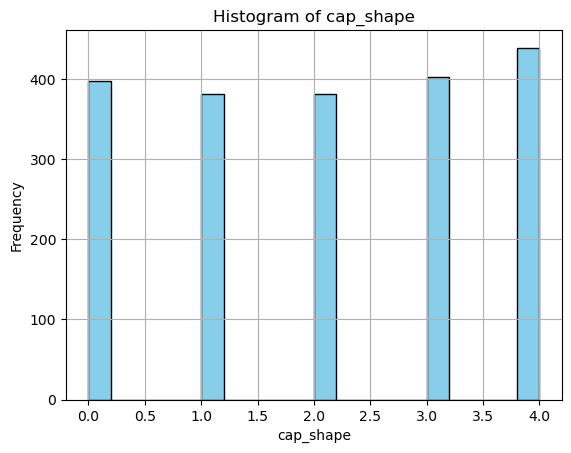

Skewness: -0.05
negatively skewed


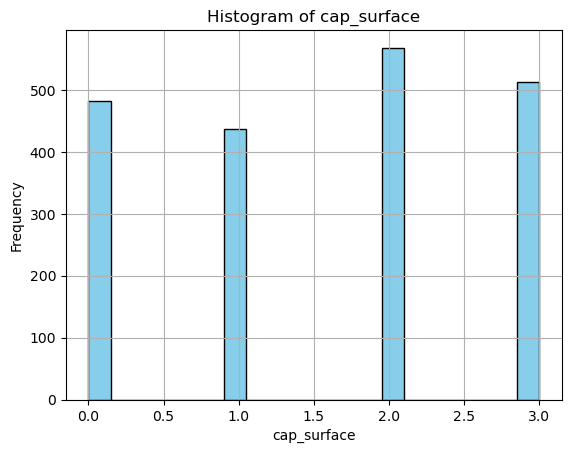

Skewness: -0.11
negatively skewed


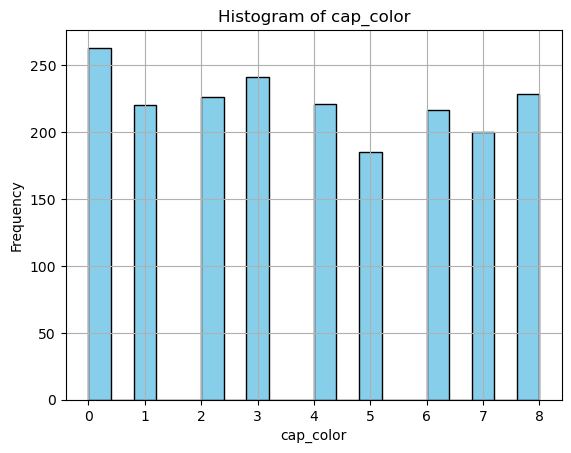

Skewness: 0.08
negatively skewed


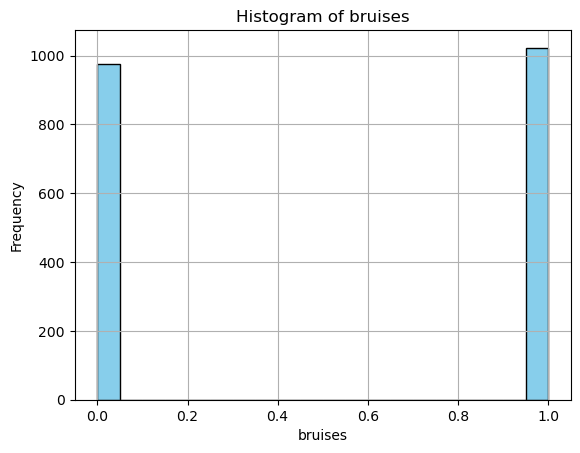

Skewness: -0.05
negatively skewed


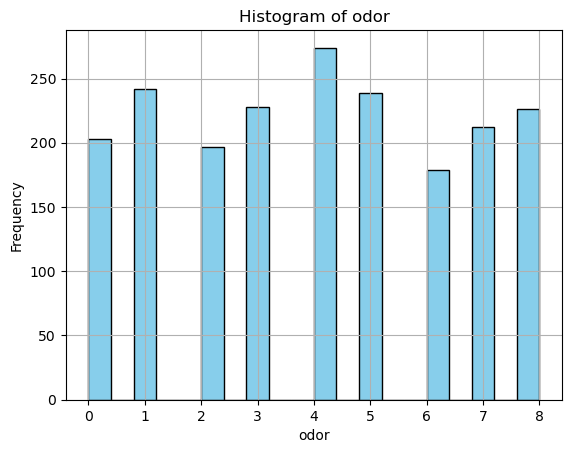

Skewness: 0.03
negatively skewed


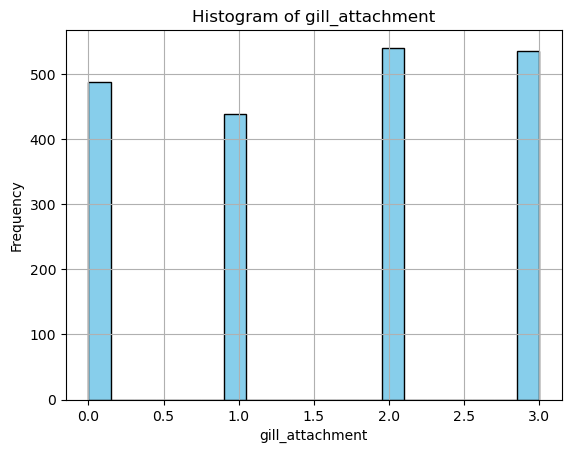

Skewness: -0.10
negatively skewed


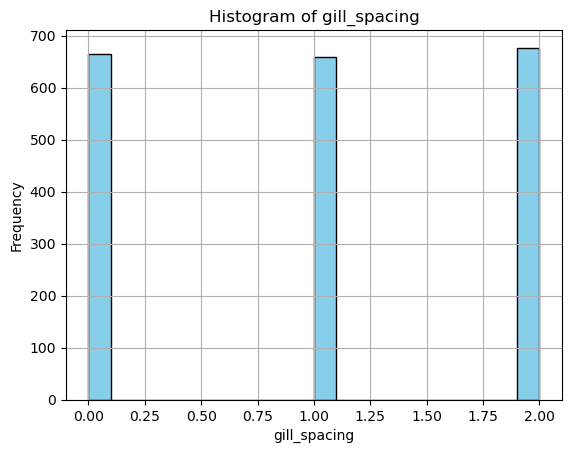

Skewness: -0.01
negatively skewed


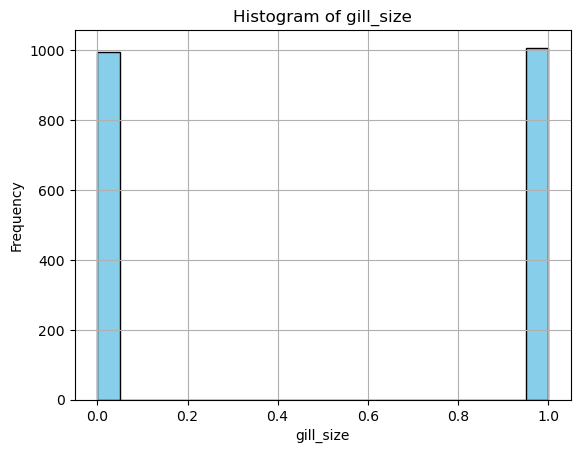

Skewness: -0.01
negatively skewed


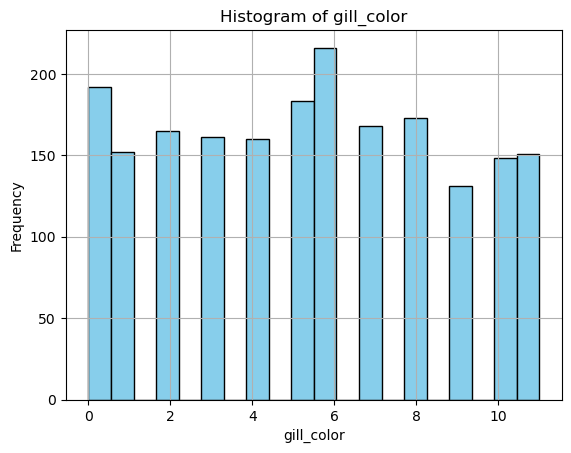

Skewness: 0.03
negatively skewed


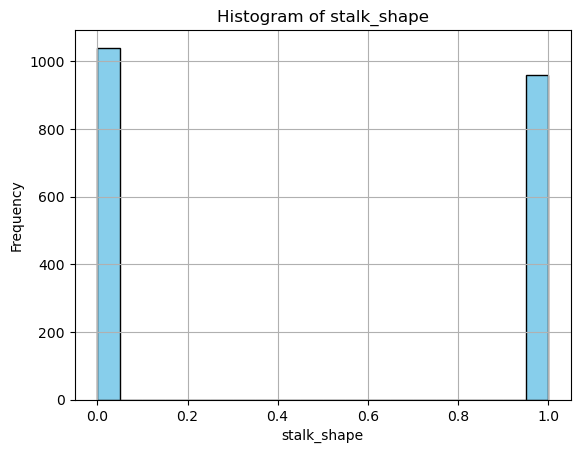

Skewness: 0.08
negatively skewed


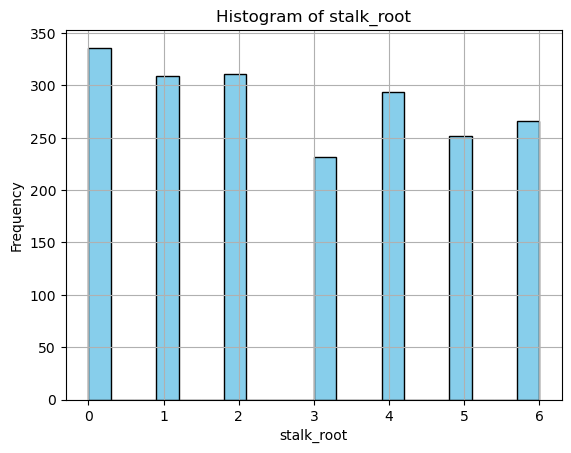

Skewness: 0.11
negatively skewed


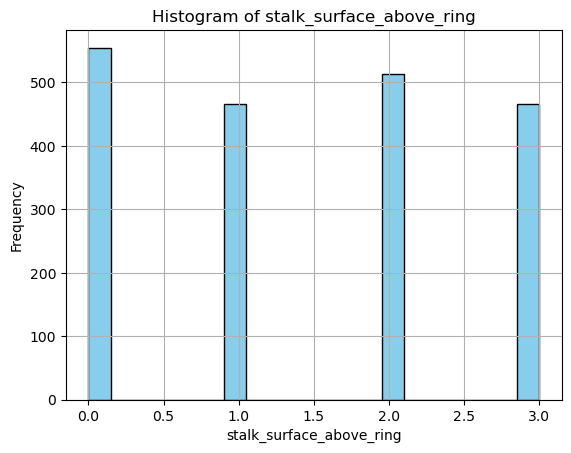

Skewness: 0.04
negatively skewed


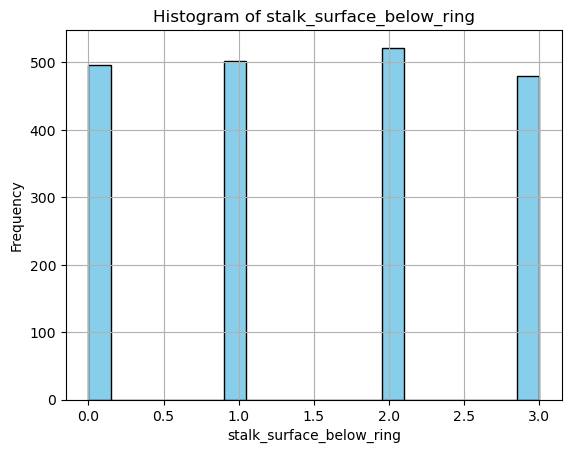

Skewness: -0.00
negatively skewed


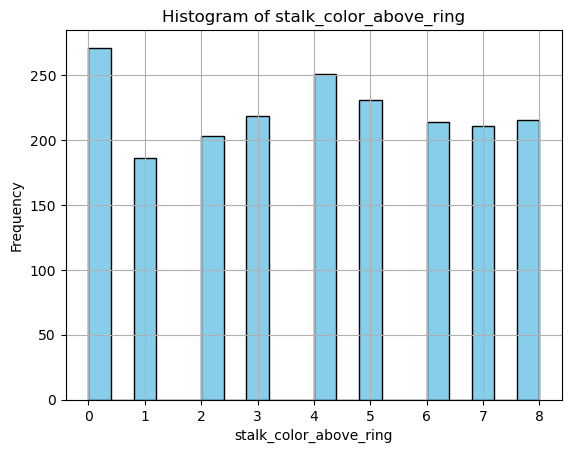

Skewness: -0.01
negatively skewed


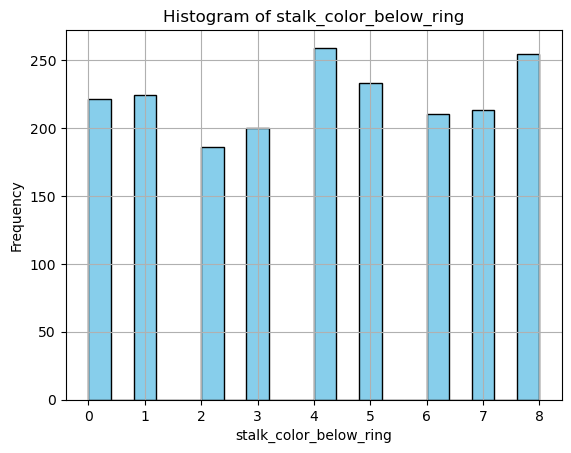

Skewness: -0.05
negatively skewed


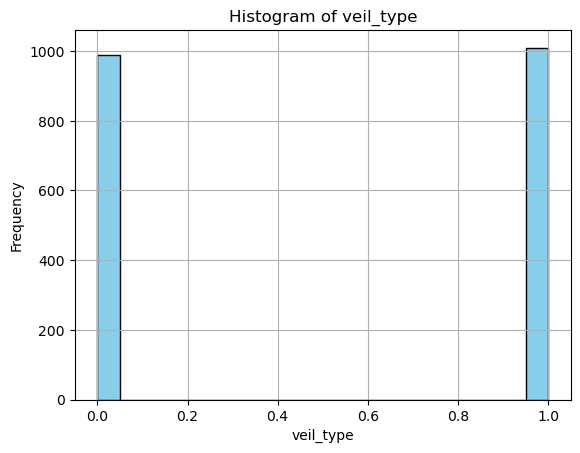

Skewness: -0.02
negatively skewed


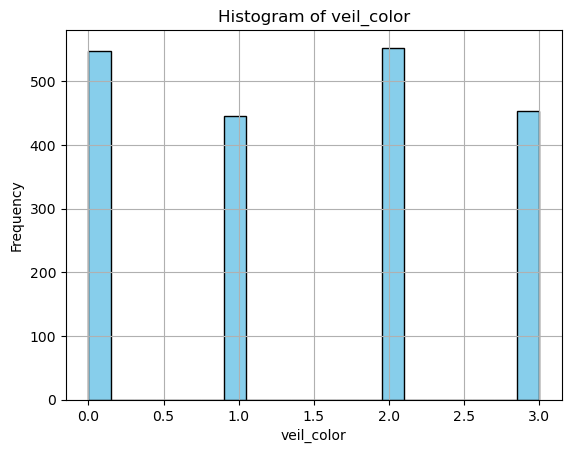

Skewness: 0.01
negatively skewed


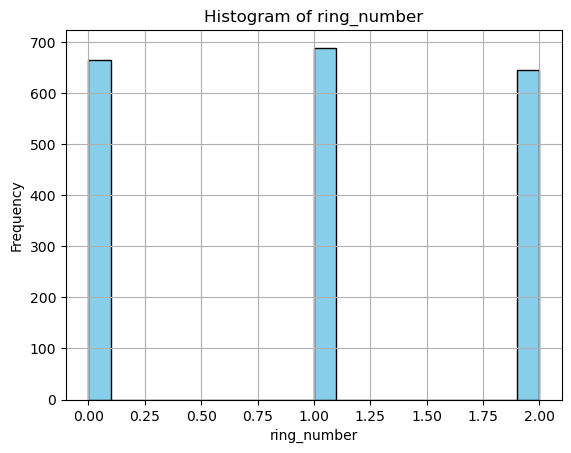

Skewness: 0.02
negatively skewed


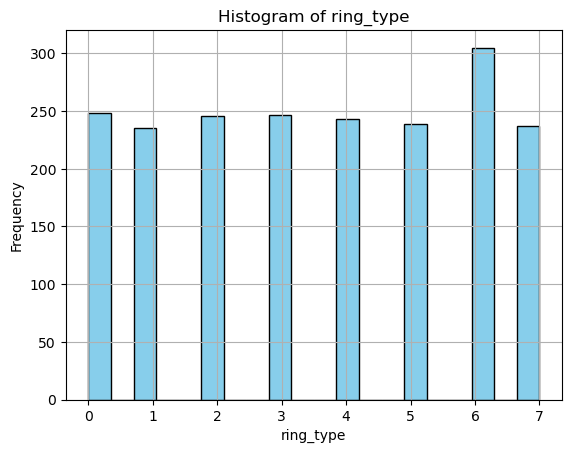

Skewness: -0.06
negatively skewed


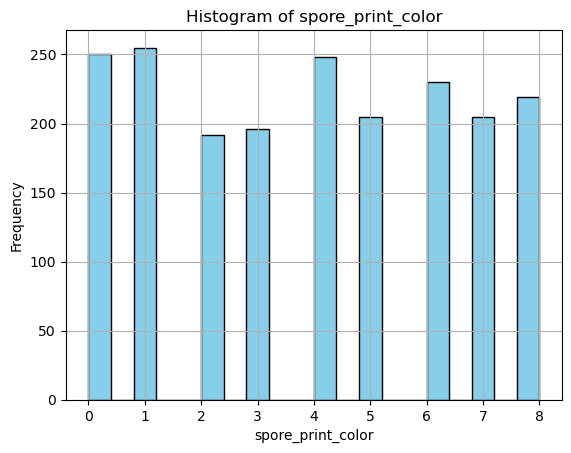

Skewness: 0.02
negatively skewed


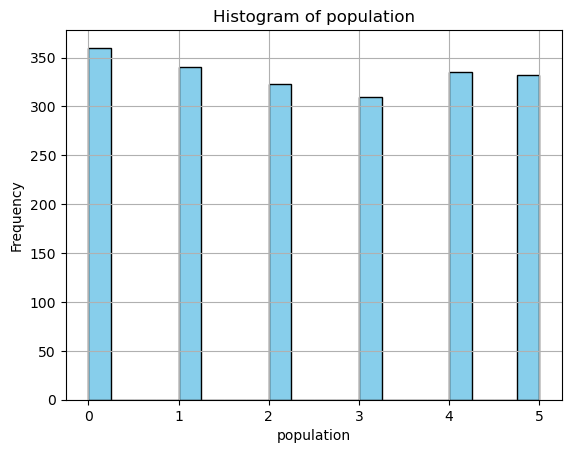

Skewness: 0.03
negatively skewed


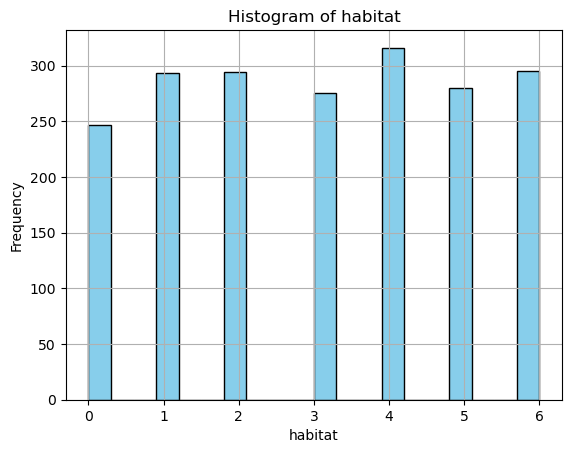

Skewness: -0.03
negatively skewed


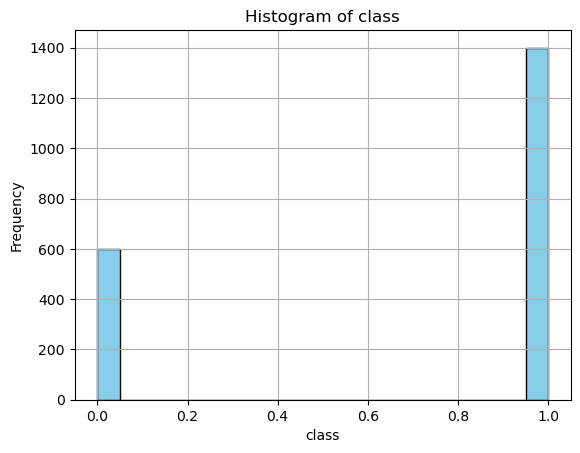

Skewness: -0.87
negatively skewed


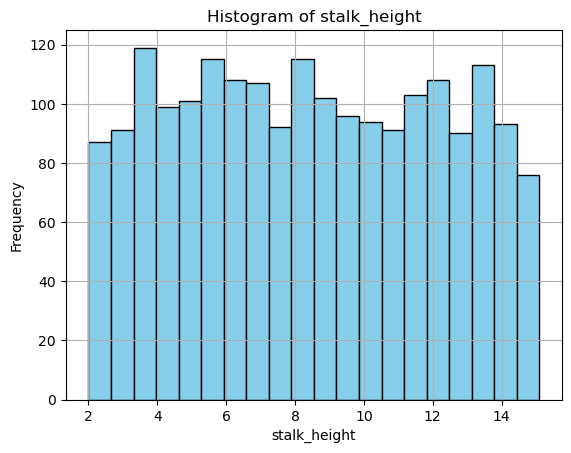

Skewness: 0.04
negatively skewed


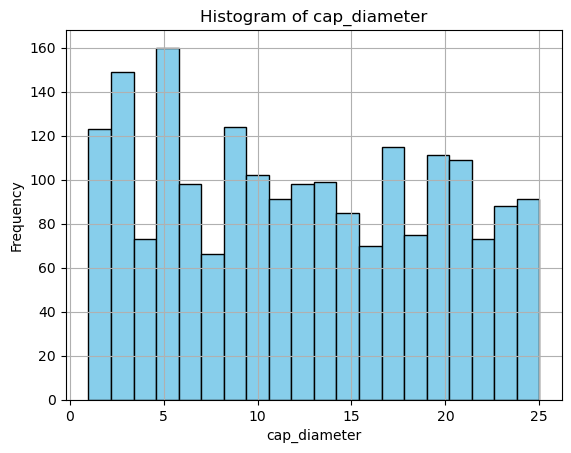

Skewness: 0.11
negatively skewed


In [18]:
# visualizations histograms
num_col=df.select_dtypes(include=["number"]).columns
for col in num_col:
    col_skewness = skew(df[col]) #calculating skewness of each histogram
    
    df[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    print(f"Skewness: {col_skewness:.2f}") # printing skewness
    # deterining the skewness(=ve or -ve)
    if col_skewness > 1:
        print("positively skewed")
    else:
        print("negatively skewed")

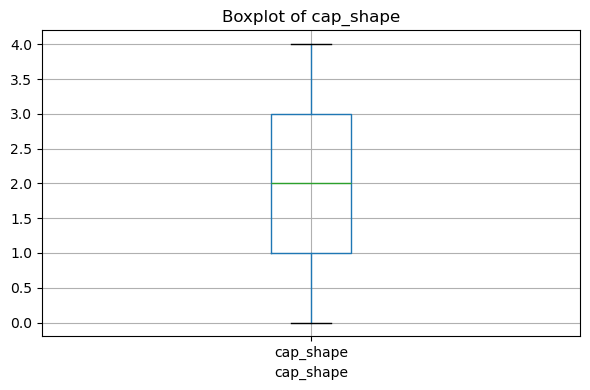

Outliers detected: 0
Lower extreme: -2.0
Upper extreme: 6.0


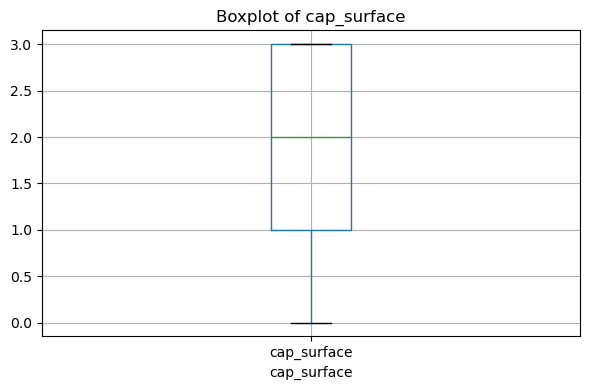

Outliers detected: 0
Lower extreme: -2.0
Upper extreme: 6.0


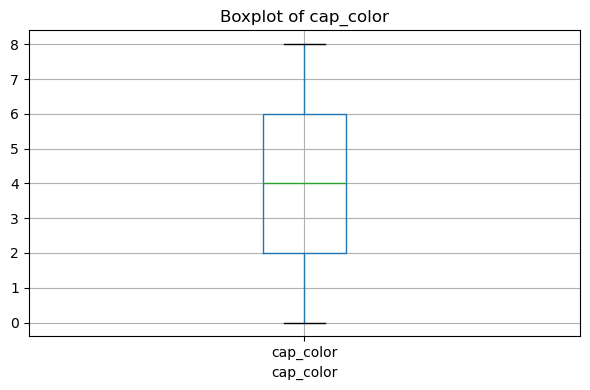

Outliers detected: 0
Lower extreme: -4.0
Upper extreme: 12.0


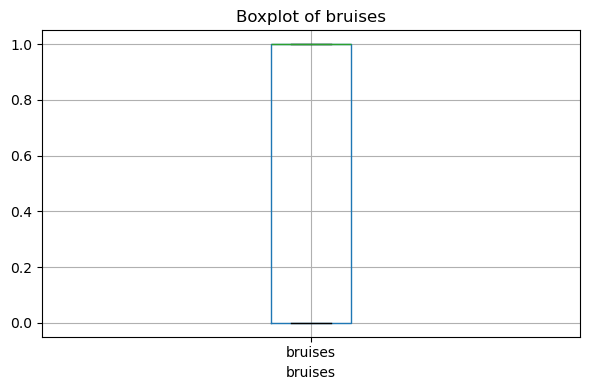

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


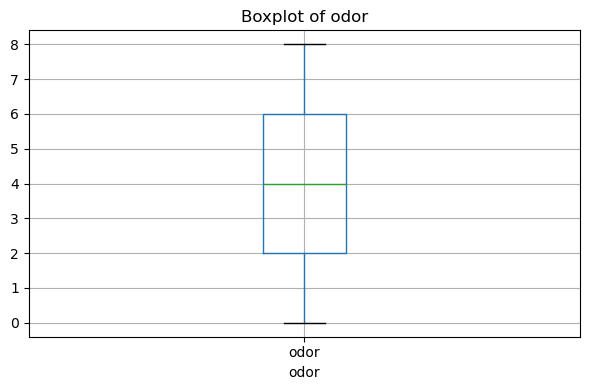

Outliers detected: 0
Lower extreme: -4.0
Upper extreme: 12.0


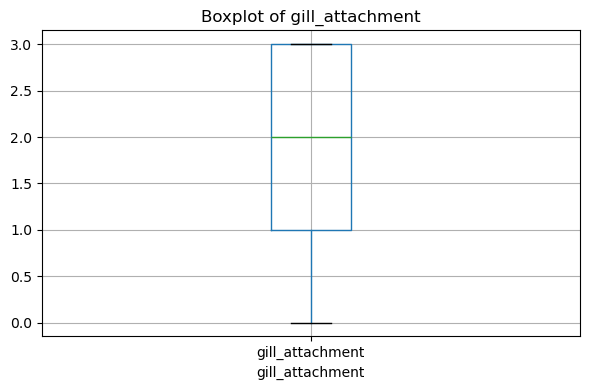

Outliers detected: 0
Lower extreme: -2.0
Upper extreme: 6.0


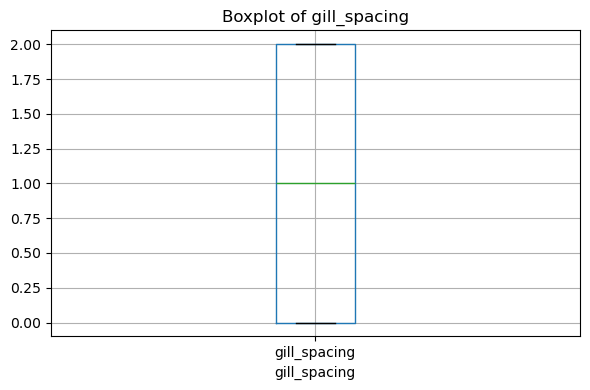

Outliers detected: 0
Lower extreme: -3.0
Upper extreme: 5.0


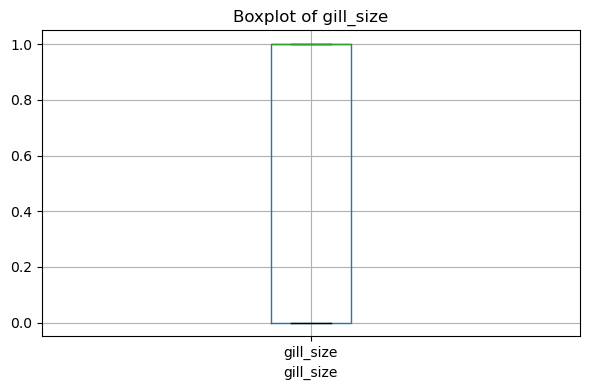

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


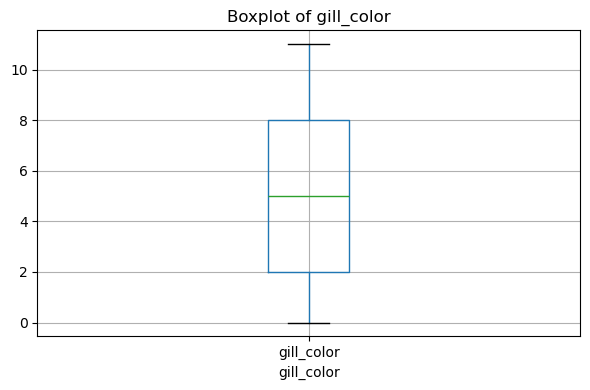

Outliers detected: 0
Lower extreme: -7.0
Upper extreme: 17.0


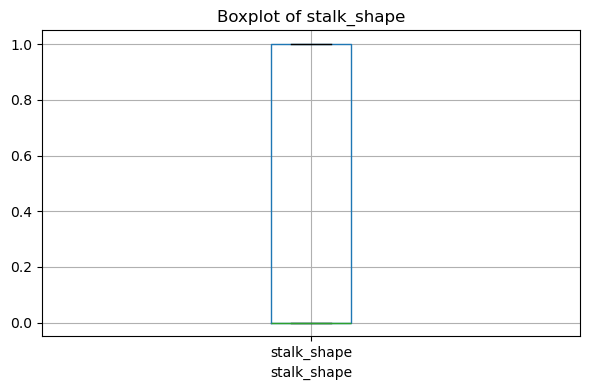

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


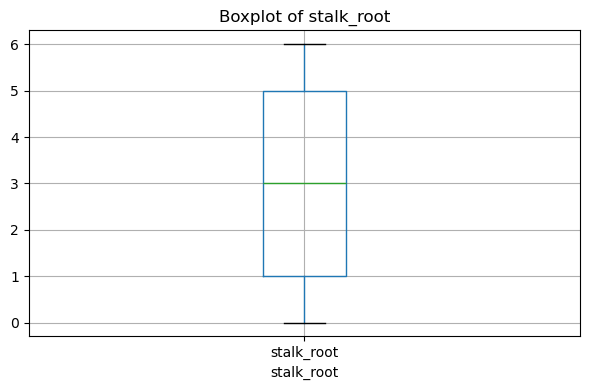

Outliers detected: 0
Lower extreme: -5.0
Upper extreme: 11.0


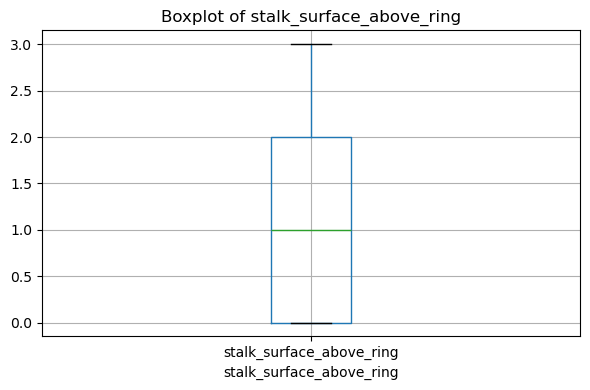

Outliers detected: 0
Lower extreme: -3.0
Upper extreme: 5.0


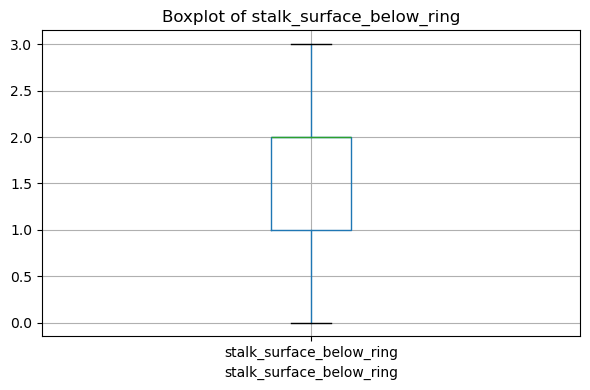

Outliers detected: 0
Lower extreme: -0.5
Upper extreme: 3.5


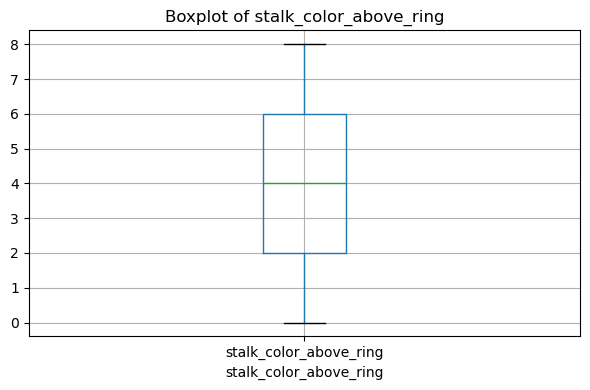

Outliers detected: 0
Lower extreme: -4.0
Upper extreme: 12.0


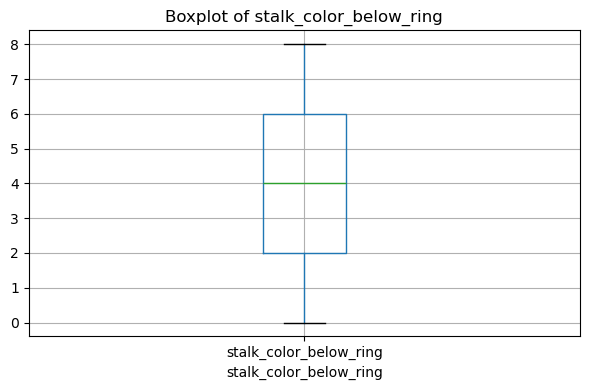

Outliers detected: 0
Lower extreme: -4.0
Upper extreme: 12.0


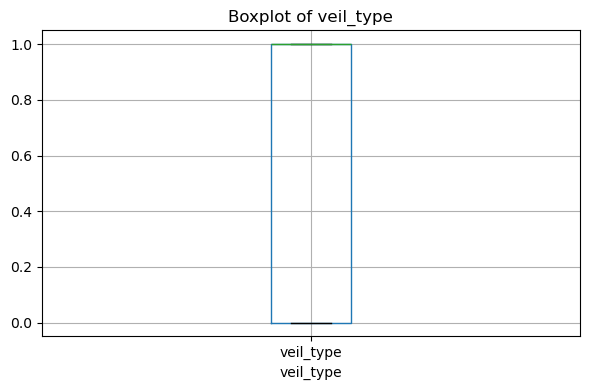

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


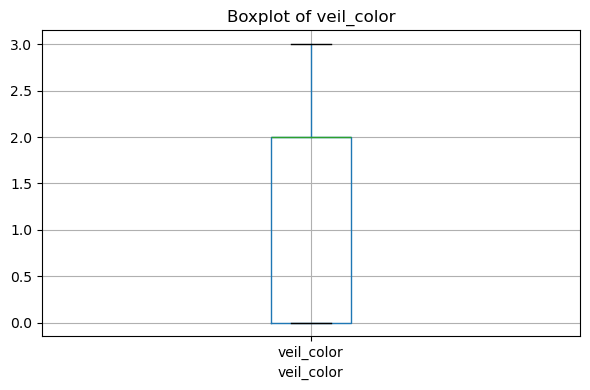

Outliers detected: 0
Lower extreme: -3.0
Upper extreme: 5.0


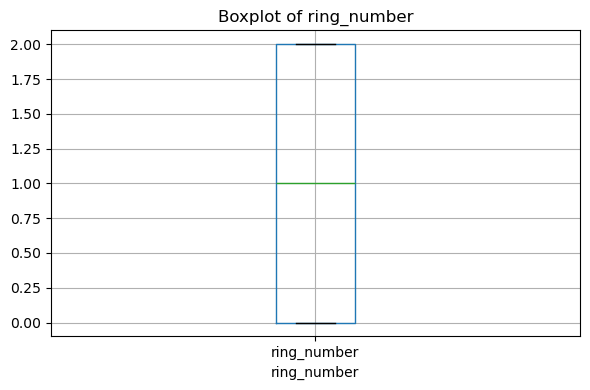

Outliers detected: 0
Lower extreme: -3.0
Upper extreme: 5.0


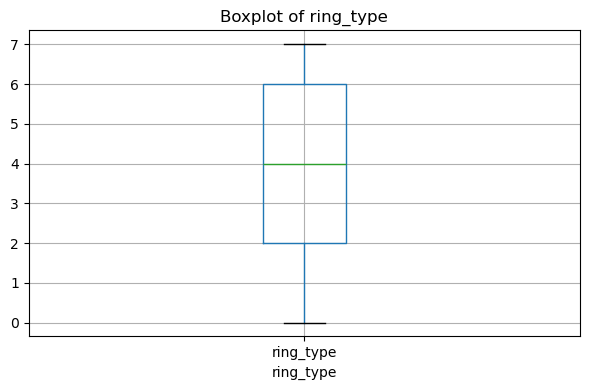

Outliers detected: 0
Lower extreme: -4.0
Upper extreme: 12.0


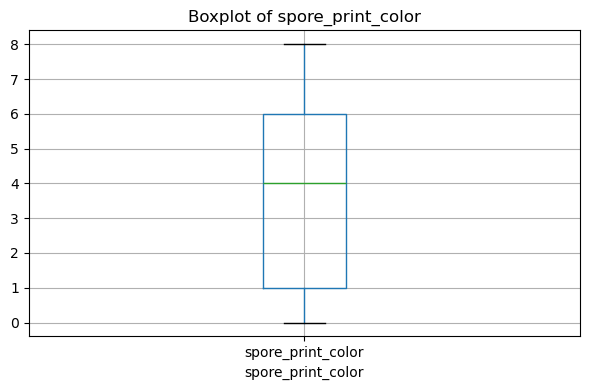

Outliers detected: 0
Lower extreme: -6.5
Upper extreme: 13.5


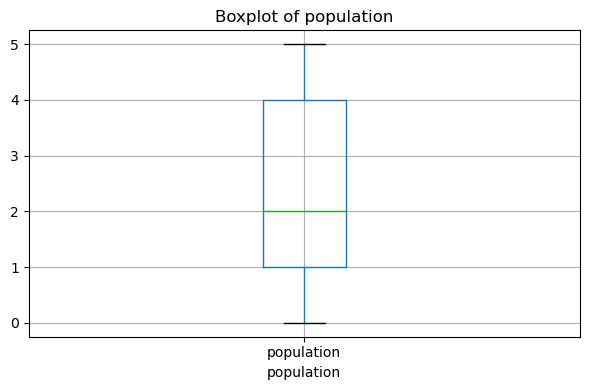

Outliers detected: 0
Lower extreme: -3.5
Upper extreme: 8.5


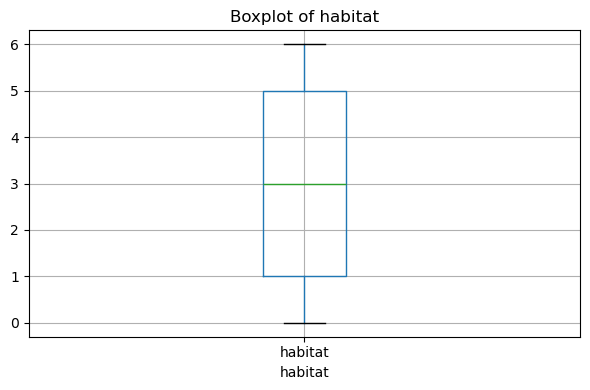

Outliers detected: 0
Lower extreme: -5.0
Upper extreme: 11.0


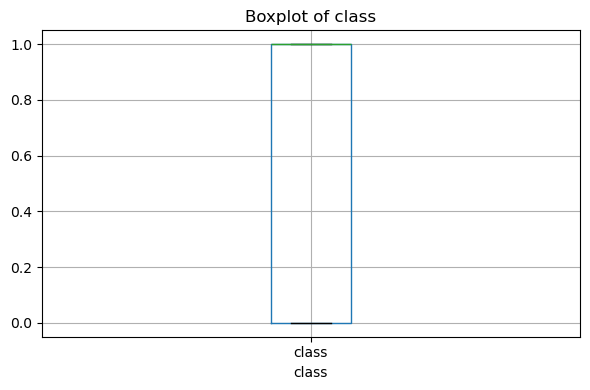

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


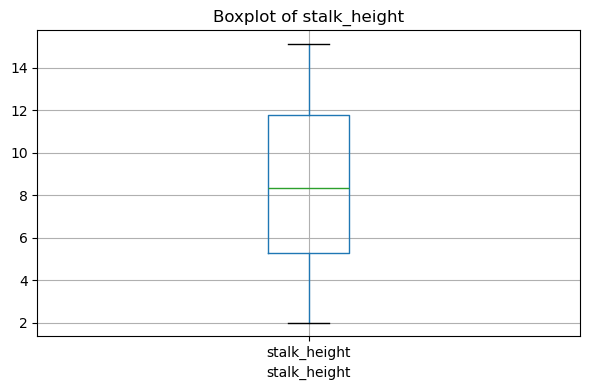

Outliers detected: 0
Lower extreme: -4.444385782956797
Upper extreme: 21.516666733410663


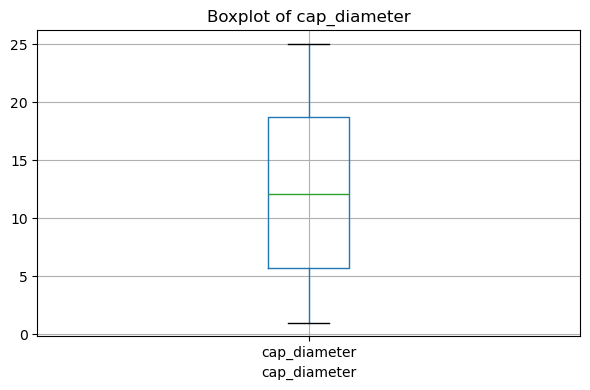

Outliers detected: 0
Lower extreme: -13.73910587093488
Upper extreme: 38.16123231958822


In [20]:
# boxplots
for col in num_col:
    series = df[col]
  # finding outliers by iqr
    Q1 = series.quantile(0.25) # determining q1
    Q3 = series.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = series[(series < lower_extreme) | (series > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

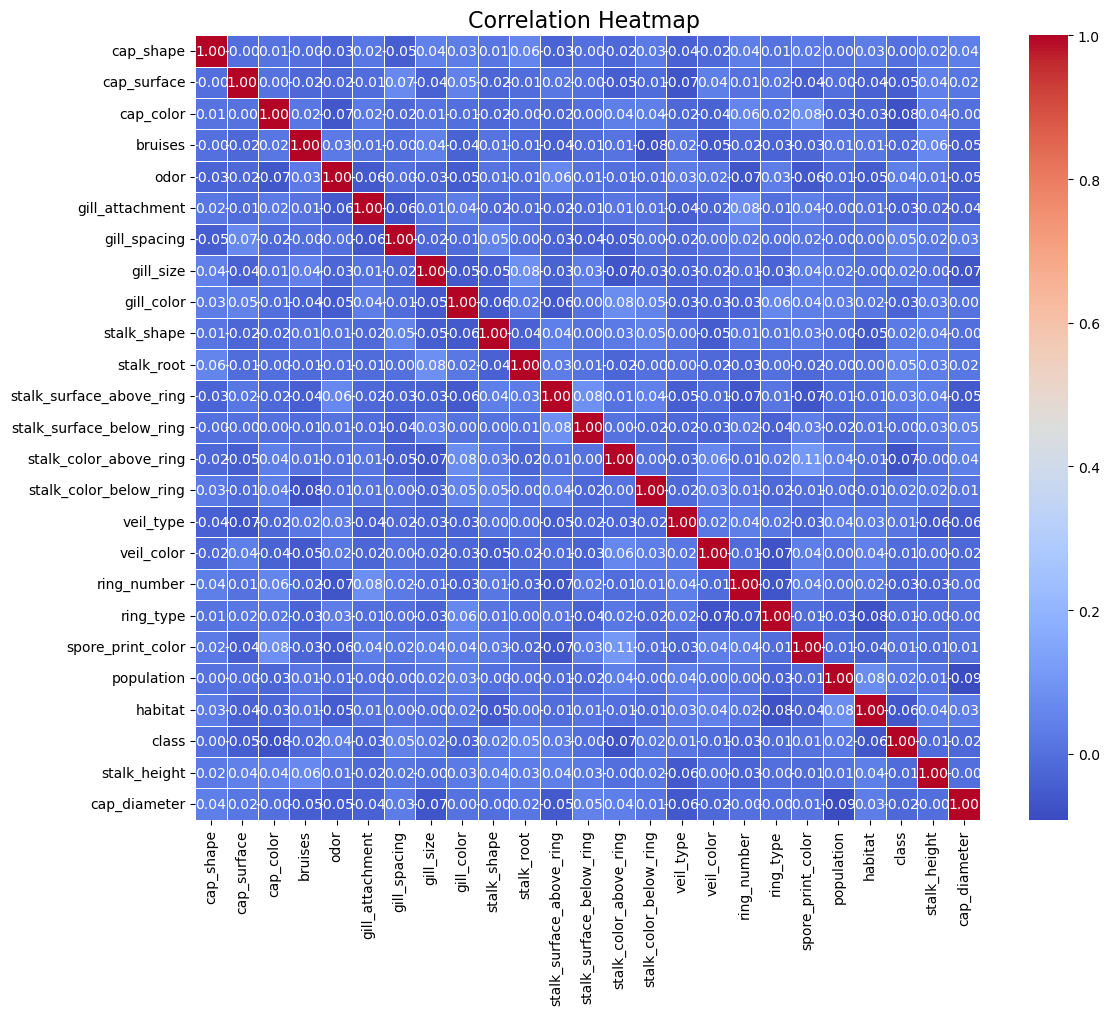

In [21]:
 #generating correlation heat maps to explore relationships between pairs of variables.
# Computing the correlation matrix
corr_matrix = df.corr()

# Setting  the matplotlib figure
plt.figure(figsize=(12, 10))

# plotting the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Correlation Heatmap ", fontsize=16)
plt.tight_layout()
plt.show()

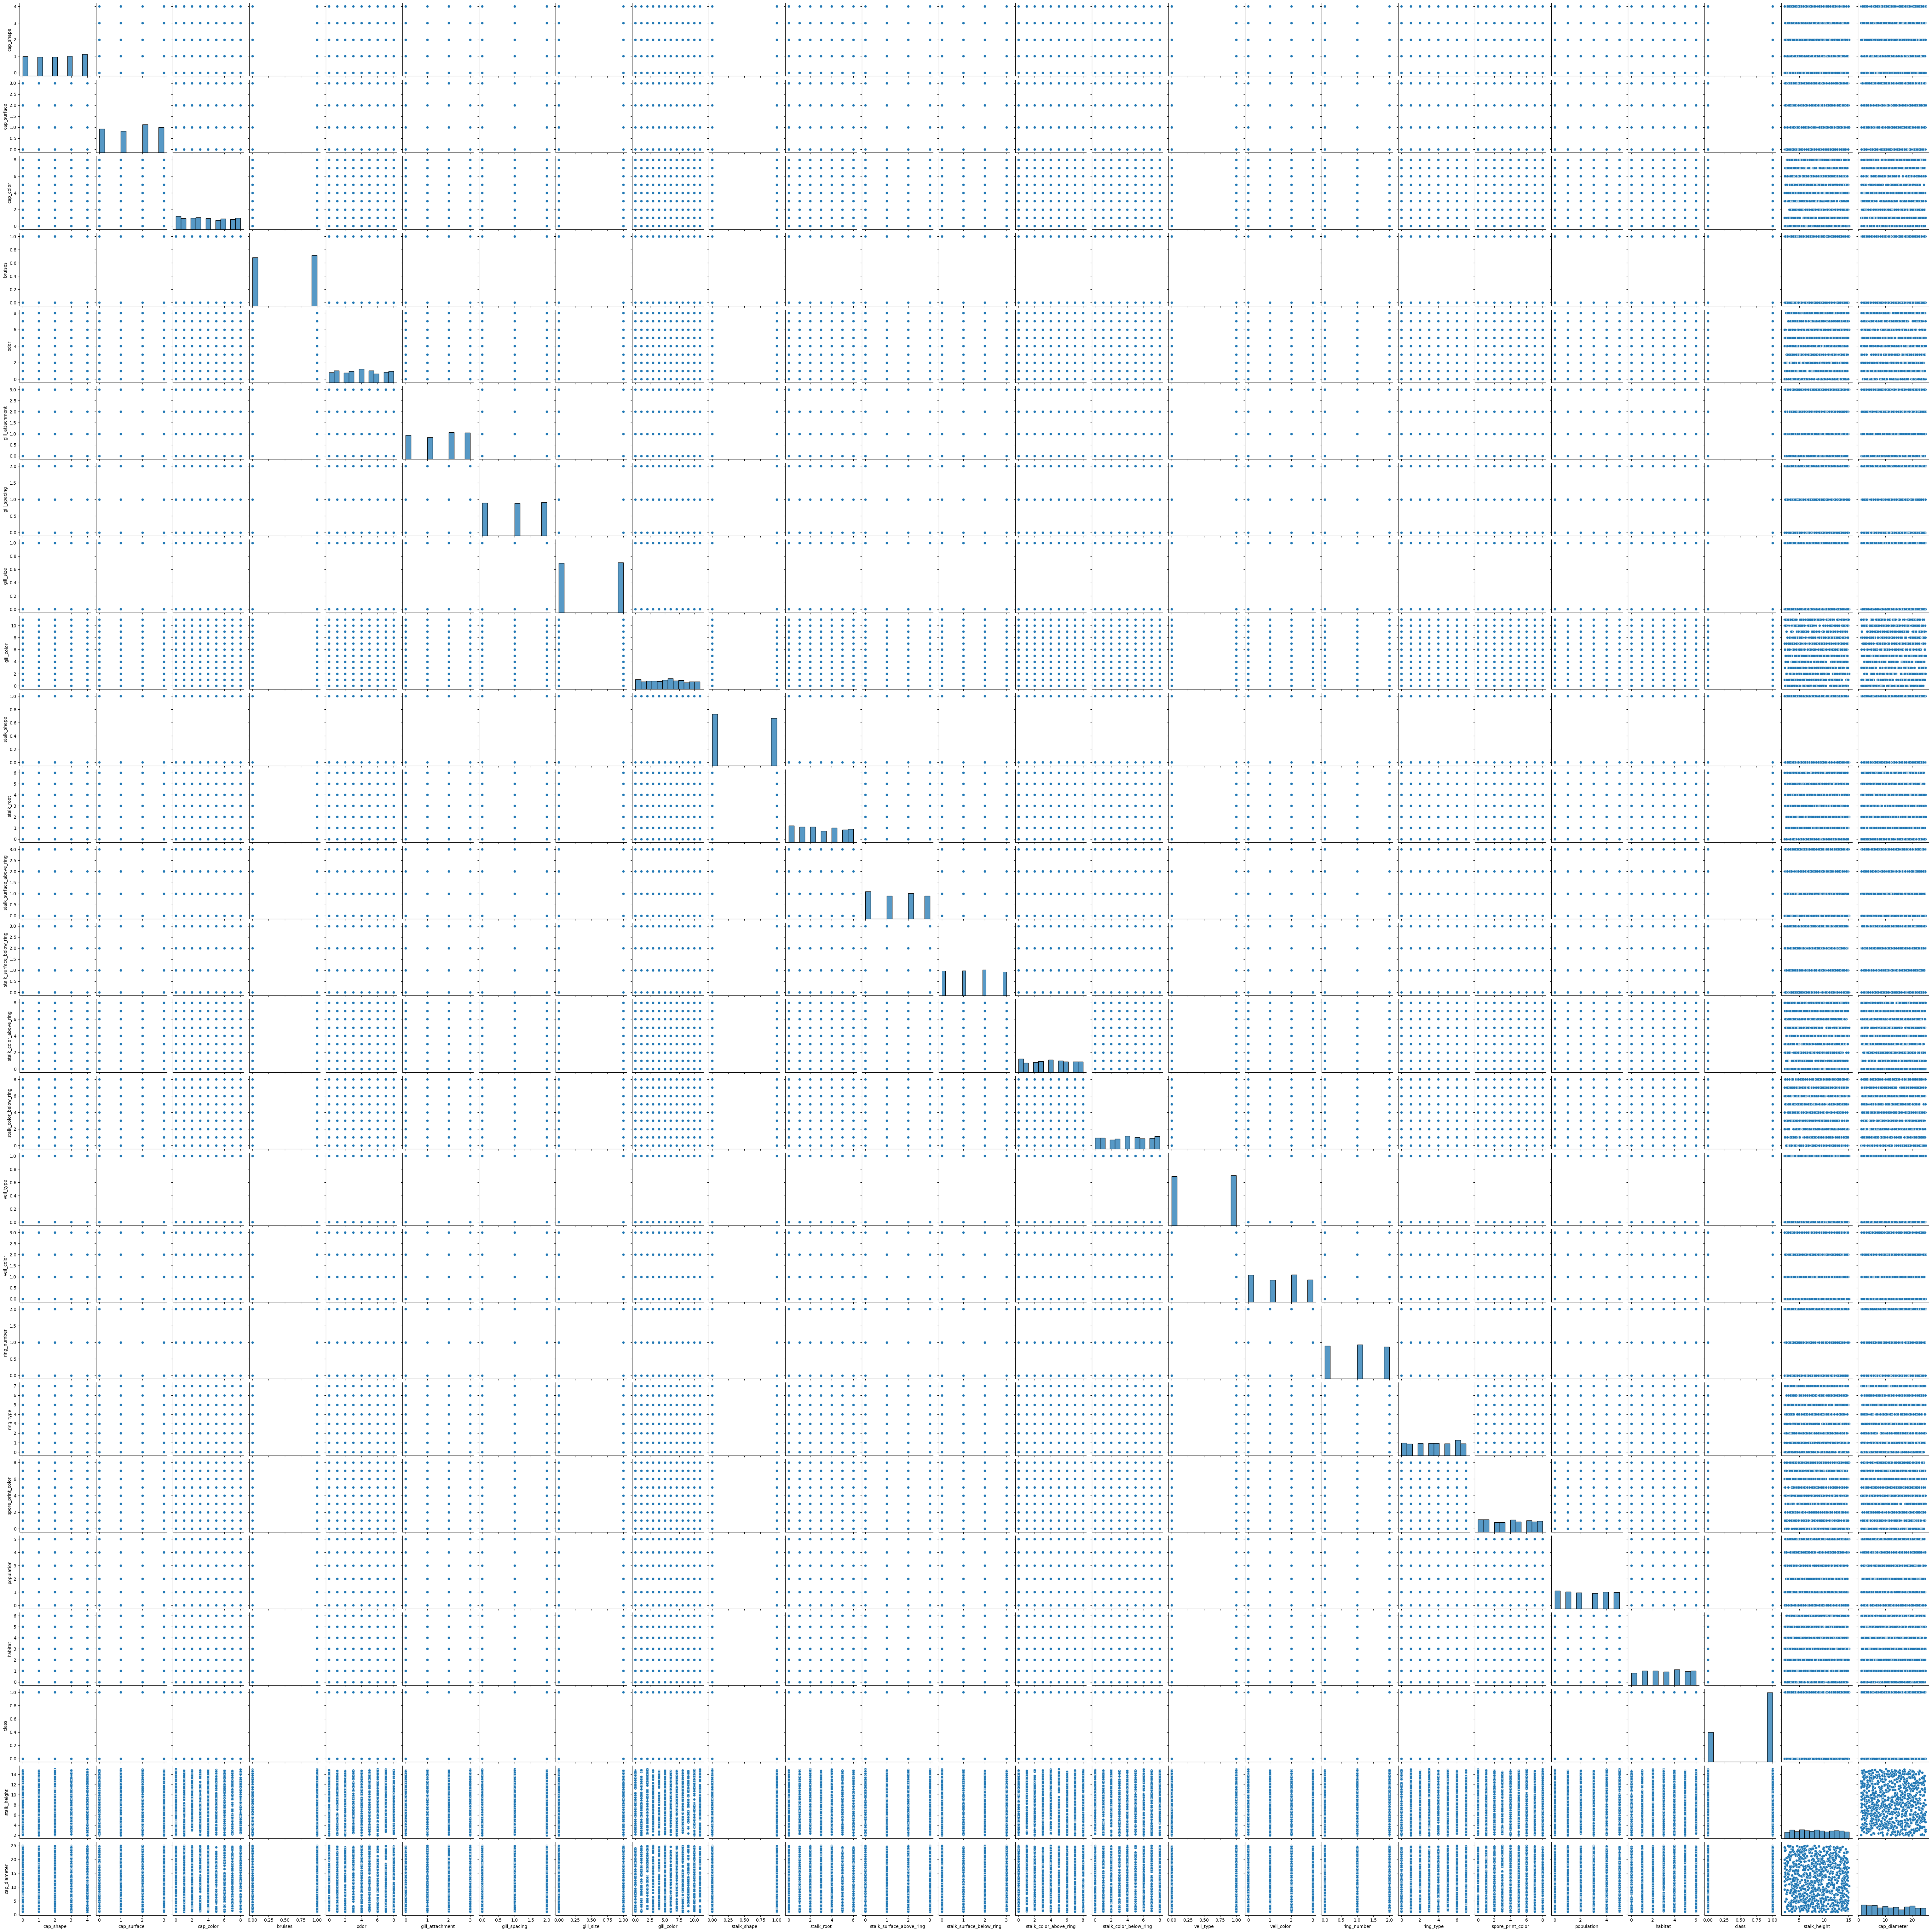

In [22]:
sns.pairplot(df)
plt.show()

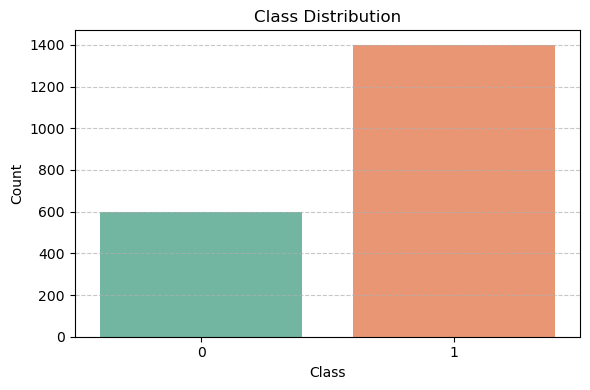

In [23]:
#	Visualizing class distributions to gauge dataset balance or imbalance.
# the class distribution shows a mild class imbalance: One class (e.g., poisonous or edible) is slightly more represented than the other.
# from the analysis can conclude that the dataset is fairly balanced
# Counting the number of samples per class
class_counts = df['class'].value_counts()

# Creating the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')

# Adding titles and labels
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# plotting
plt.tight_layout()
plt.show()


In [25]:
#Splitting the dataset into training and testing sets.
x=df.drop('class',axis=1)
y=df['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [26]:
x.head()

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0          4            2          7        0     1                1   
1          4            0          6        0     1                3   
2          3            1          5        1     4                1   
3          0            2          4        1     3                3   
4          3            3          8        1     5                2   

   gill_spacing  gill_size  gill_color  stalk_shape  ...  \
0             2          0           7            1  ...   
1             1          1           3            0  ...   
2             1          0           8            1  ...   
3             0          0           6            0  ...   
4             1          1           6            0  ...   

   stalk_color_below_ring  veil_type  veil_color  ring_number  ring_type  \
0                       8          0           0            2          6   
1                       0          1           0            2          6   
2                       3          1           3            2          6   
3                       5          0           3            2          0   
4                       7          1           2            0          4   

   spore_print_color  population  habitat  stalk_height  cap_diameter  
0                  3           1        5     14.276173      5.054983  
1                  1           2        5      3.952715     19.068319  
2                  6           0        5      9.054265      7.205884  
3                  4           1        0      5.226499     20.932692  
4                  8           1        4     14.037532     12.545245  

[5 rows x 24 columns]

In [27]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: class, dtype: int32

In [28]:
# Task 4: SVM Implementation and evaluation
model=SVC(kernel='linear',gamma='scale',C=5)
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [29]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       199
           1       0.67      1.00      0.80       401

    accuracy                           0.67       600
   macro avg       0.33      0.50      0.40       600
weighted avg       0.45      0.67      0.54       600



In [30]:
# hyper parameter tuning and optimization
# kernel - RBF
param_grids = [{'kernel':['rbf'], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(model, param_grids, cv=20)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 15, 'kernel': 'rbf'}

In [31]:
# deploying model with best params provided by gridsearch
model1=SVC(kernel='rbf', C=15)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.44      0.58       199
           1       0.77      0.95      0.85       401

    accuracy                           0.78       600
   macro avg       0.80      0.70      0.71       600
weighted avg       0.79      0.78      0.76       600



In [32]:
# kernel- polynomial
param_grids = [{'kernel':['poly'], 'degree':[0,1,2,3,4,5,6], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(model, param_grids, cv=20)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 15, 'degree': 6, 'kernel': 'poly'}

In [33]:
# deploying model with best params provided by gridsearch
model2=SVC(kernel='poly', C=15,degree=6)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       199
           1       0.87      0.92      0.89       401

    accuracy                           0.85       600
   macro avg       0.84      0.82      0.83       600
weighted avg       0.85      0.85      0.85       600



In [34]:
# kernel-linear
# deploying model with best params provided by gridsearch
model3=SVC(kernel='linear', C=15)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       199
           1       0.67      1.00      0.80       401

    accuracy                           0.67       600
   macro avg       0.33      0.50      0.40       600
weighted avg       0.45      0.67      0.54       600



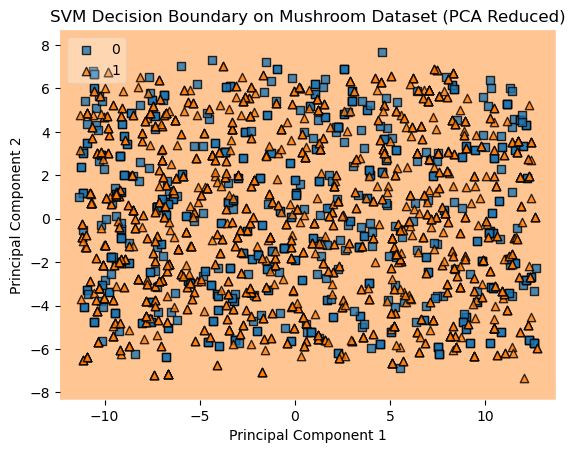

In [59]:
# Task 5: Visualization of SVM Results
#  Reducing dimensions to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x)

# Training the model with SVc
model = SVC(kernel='linear')
model.fit(X_reduced, y)

#  Plotting
plot_decision_regions(X=X_reduced, y=y.values, clf=model, legend=2)
plt.title("SVM Decision Boundary on Mushroom Dataset (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [35]:
#Task 7: Comparison and Analysis
#1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
# from the above analysis svc with kernel-polynomial is performing best and is having the highest accuracy than the others (svc with kernels-linear and rbf) 
# parameter tuning using grid search is taking longer time and training of the model is also taking longer time.
#2.Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
#strengths: 
# 1)Balanced Classes:The class feature (edible vs poisonous) is well-balanced. This helps SVM perform effectively since it is sensitive to class imbalances.
# 2)Robust to Overfitting (with proper regularization):SVM’s margin-maximization principle helps generalize well, especially if tuned properly (C and kernel parameters).
# weakness:
# 1)Mostly Categorical Features:The dataset is predominantly categorical (23 out of 25 features). SVM doesn’t inherently handle categorical data well, they need to be encoded ,which increases dimensionality.
# 2)Kernel and Hyperparameter Sensitivity:SVM performance heavily depends on choosing the right kernel and tuning hyperparameters (C, gamma). Poor choices can degrade performance.

#3.Discuss practical implications of SVM in real-world classification tasks.
# 1)Not Ideal for Large Datasets Training time is slow for large datasets .
# 2)Poor Performance with Noisy or Overlapping Data.
# 3)Requires Careful Tuning
